In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from tidegauge_functions import read_tidegauge_psmsl

# %matplotlib notebook
%matplotlib inline
# %matplotlib widget

## Read in VLIZ realtime data

currently need to download HTML table, rename with '.xls' extension, open in Microsoft Excel (or similar), and save as a CSV

In [2]:
dir_in = 'data/tidegauge'
# file_in = 'h820'
file_in = 'vliz_realtime_h820_20201019'
ext = '.csv'

filepath = os.path.join(dir_in, file_in + ext)

df = pd.read_csv(filepath)
df

,Time (UTC),prs(m)
0,9/19/20 18:57,-3.186
1,9/19/20 19:02,-3.113
2,9/19/20 19:07,-3.041
3,9/19/20 19:12,-2.964
4,9/19/20 19:17,-2.891
...,...,...
8629,10/19/20 18:28,-3.468
8630,10/19/20 18:33,-3.442
8631,10/19/20 18:38,-3.404
8632,10/19/20 18:43,-3.374


In [3]:
dt = pd.to_datetime(df['Time (UTC)'])

# create datetime index
df.index = pd.DatetimeIndex(dt)
df

,Time (UTC),prs(m)
Time (UTC),,
2020-09-19 18:57:00,9/19/20 18:57,-3.186
2020-09-19 19:02:00,9/19/20 19:02,-3.113
2020-09-19 19:07:00,9/19/20 19:07,-3.041
2020-09-19 19:12:00,9/19/20 19:12,-2.964
2020-09-19 19:17:00,9/19/20 19:17,-2.891
...,...,...
2020-10-19 18:28:00,10/19/20 18:28,-3.468
2020-10-19 18:33:00,10/19/20 18:33,-3.442
2020-10-19 18:38:00,10/19/20 18:38,-3.404


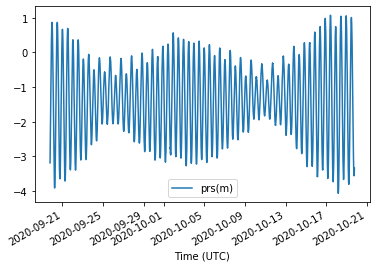

In [4]:
df[['prs(m)']].plot()

In [5]:
df[['prs_shifted']] = df[['prs(m)']] - df[['prs(m)']].mean()


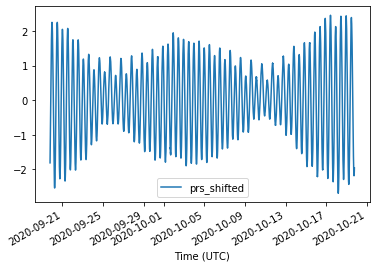

In [6]:
df[['prs_shifted']].plot()

## Read in Greenland Rising tide gauge

ONSET

In [7]:
file_in = 'EtEllerAndet_20201018'

filepath = os.path.join(dir_in, file_in + ext)

rt = pd.read_csv(filepath, skiprows=5, header=None, engine='c')

# # columns = ['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']
# df = pd.read_csv(path, skiprows=3, header=None, engine='c')
# if len(df.columns) == len(columns):
#     df.columns = ['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']

rt

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2020-10-13 13:27:45,2.1701,2.1738,2.1627,2.1681,0.0049,16.6311,16.6339,16.6221,16.6283,...,35.19,35.19,0.00,3.305,14.4610,,,,,
1,2020-10-13 13:28:45,2.1860,2.1860,2.1756,2.1791,0.0048,16.6457,16.6457,16.6356,16.6390,...,35.19,35.19,0.00,3.341,14.4597,,,,,
2,2020-10-13 13:29:45,2.2078,2.2078,2.1930,2.1989,0.0066,16.6664,16.6664,16.6535,16.6580,...,35.19,35.19,0.00,3.391,14.4587,,,,,
3,2020-10-13 13:30:45,2.2245,2.2245,2.2089,2.2153,0.0067,16.6822,16.6822,16.6670,16.6737,...,35.19,35.19,0.00,3.429,14.4577,,,,,
4,2020-10-13 13:31:45,2.2316,2.2316,2.2241,2.2267,0.0033,16.6917,16.6917,16.6816,16.6850,...,35.19,35.19,0.00,3.445,14.4601,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,2020-10-18 11:57:45,3.1852,3.2221,3.1852,3.1970,0.0171,18.0406,18.0775,18.0406,18.0525,...,37.12,37.12,0.00,5.623,14.8553,,,,,
7117,2020-10-18 11:58:45,3.1610,3.1984,3.1501,3.1766,0.0247,18.0167,18.0536,18.0048,18.0321,...,37.12,37.12,0.00,5.568,14.8558,,,,,
7118,2020-10-18 11:59:45,3.1284,3.1349,3.1284,3.1316,0.0027,17.9821,17.9895,17.9821,17.9861,...,37.12,37.12,0.00,5.493,14.8538,,,,,
7119,2020-10-18 12:00:45,3.0945,3.1218,3.0945,3.1104,0.0127,17.9481,17.9759,17.9481,17.9651,...,37.12,37.12,0.00,5.416,14.8536,,,,,


In [8]:
rt.keys()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [9]:
columns = ["Date Time - GMT -03:00","Diff Press, (kPa)","Diff Press - Max, (kPa)",
           "Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)",
           "Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)",
           "Abs Press - StdDev, (kPa)","Temp, (*C)","Temp - Max, (*C)","Temp - Min, (*C)","Temp - Avg, (*C)",
           "Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)",
           "Water Density, (kg/m3)","Host Connect","EOF","unknown"]
if len(rt.columns) == len(columns):
    rt.columns = columns

dt = pd.to_datetime(rt['Date Time - GMT -03:00'])

# create datetime index
rt.index = pd.DatetimeIndex(dt)

rt = rt.drop('Date Time - GMT -03:00', axis=1)

# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
rt = rt.apply(pd.to_numeric, errors='coerce')

rt

,"Diff Press, (kPa)","Diff Press - Max, (kPa)","Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)","Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)","Abs Press - StdDev, (kPa)",...,"Temp - Min, (*C)","Temp - Avg, (*C)","Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)","Water Density, (kg/m3)",Host Connect,EOF,unknown
Date Time - GMT -03:00,,,,,,,,,,,,,,,,,,,,,
2020-10-13 13:27:45,2.1701,2.1738,2.1627,2.1681,0.0049,16.6311,16.6339,16.6221,16.6283,0.0050,...,35.19,35.19,0.0,3.305,14.4610,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:28:45,2.1860,2.1860,2.1756,2.1791,0.0048,16.6457,16.6457,16.6356,16.6390,0.0045,...,35.19,35.19,0.0,3.341,14.4597,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:29:45,2.2078,2.2078,2.1930,2.1989,0.0066,16.6664,16.6664,16.6535,16.6580,0.0056,...,35.19,35.19,0.0,3.391,14.4587,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:30:45,2.2245,2.2245,2.2089,2.2153,0.0067,16.6822,16.6822,16.6670,16.6737,0.0062,...,35.19,35.19,0.0,3.429,14.4577,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:31:45,2.2316,2.2316,2.2241,2.2267,0.0033,16.6917,16.6917,16.6816,16.6850,0.0045,...,35.19,35.19,0.0,3.445,14.4601,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18 11:57:45,3.1852,3.2221,3.1852,3.1970,0.0171,18.0406,18.0775,18.0406,18.0525,0.0170,...,37.12,37.12,0.0,5.623,14.8553,NaN,NaN,NaN,NaN,NaN
2020-10-18 11:58:45,3.1610,3.1984,3.1501,3.1766,0.0247,18.0167,18.0536,18.0048,18.0321,0.0250,...,37.12,37.12,0.0,5.568,14.8558,NaN,NaN,NaN,NaN,NaN
2020-10-18 11:59:45,3.1284,3.1349,3.1284,3.1316,0.0027,17.9821,17.9895,17.9821,17.9861,0.0028,...,37.12,37.12,0.0,5.493,14.8538,NaN,NaN,NaN,NaN,NaN


In [10]:
rt.describe()

,"Diff Press, (kPa)","Diff Press - Max, (kPa)","Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)","Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)","Abs Press - StdDev, (kPa)",...,"Temp - Min, (*C)","Temp - Avg, (*C)","Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)","Water Density, (kg/m3)",Host Connect,EOF,unknown
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,...,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,0.0,0.0,0.0,0.0,0.0
mean,2.878443,2.889364,2.867243,2.878335,0.009925,17.696028,17.706788,17.684893,17.695881,0.009677,...,36.530718,36.542962,0.005328,4.922353,14.817584,NaN,NaN,NaN,NaN,NaN
std,2.091652,2.093091,2.089824,2.091443,0.008881,2.090639,2.092372,2.088565,2.090434,0.008911,...,1.242550,1.241514,0.031722,4.776978,0.140077,NaN,NaN,NaN,NaN,NaN
min,-0.016600,-0.015300,-0.032500,-0.016100,0.000100,14.781900,14.783500,14.781300,14.782400,0.000000,...,31.630000,31.630000,0.000000,-1.689000,14.454800,NaN,NaN,NaN,NaN,NaN
25%,0.798575,0.808650,0.788400,0.801125,0.004200,15.586900,15.592625,15.573325,15.585200,0.004000,...,35.780000,35.780000,0.000000,0.172250,14.794025,NaN,NaN,NaN,NaN,NaN
50%,2.939600,2.952450,2.923950,2.937050,0.007400,17.719900,17.738700,17.705850,17.724050,0.007300,...,36.550000,36.550000,0.000000,5.062000,14.819450,NaN,NaN,NaN,NaN,NaN
75%,4.773075,4.783400,4.762250,4.773225,0.012600,19.519125,19.528725,19.504975,19.514775,0.012500,...,36.930000,36.930000,0.000000,9.249000,14.878400,NaN,NaN,NaN,NaN,NaN
max,6.560300,6.575000,6.514100,6.536100,0.081600,21.501500,21.512000,21.450800,21.473500,0.083500,...,41.090000,41.090000,0.380000,13.331000,15.065800,NaN,NaN,NaN,NaN,NaN


In [11]:
starttime = pd.Timestamp('2020-10-14T00:00')
endtime = pd.Timestamp('2020-10-19T12:00')

(737712.0, 737717.5)

<Figure size 576x360 with 0 Axes>

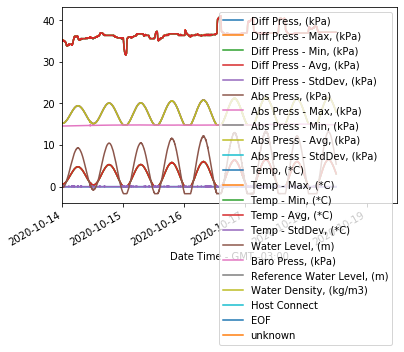

In [12]:
# Set up
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)

# Plot
# ln1 = plt.plot(df['SSH'], '-ok', label='daily')
# ln2 = plt.plot(hourly['SSH'], color='orange', label='hourly')


# Customize
# ax.set_title('')
# ax.set_xlim(pd.Timestamp('2020-10-14'), pd.Timestamp('2020-10-16'))


rt.plot()
plt.xlim(starttime, endtime)

(737712.0, 737717.5)

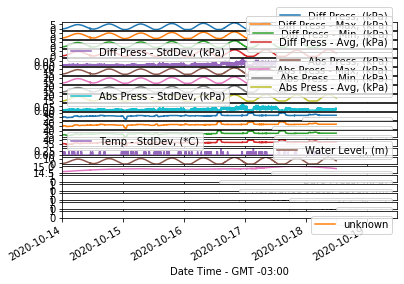

In [13]:
# plt.figure(figsize=(5,15))
rt.plot(subplots=True)#, layout=(12,2))
plt.xlim(starttime, endtime)

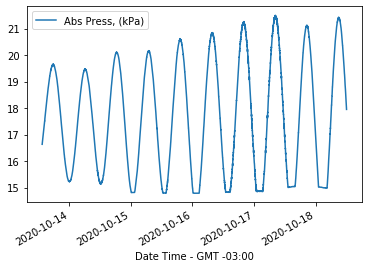

In [22]:
rt[["Abs Press, (kPa)"]].plot()


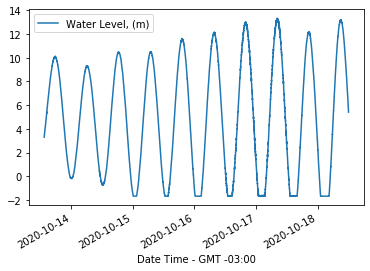

In [23]:
rt[["Water Level, (m)"]].plot()

In [24]:
rt["WaterLevel_shifted"] = rt[["Water Level, (m)"]] - rt[["Water Level, (m)"]].mean()
rt["WaterLevel_shifted_m"] = rt["WaterLevel_shifted"] * (1609.34/5280)

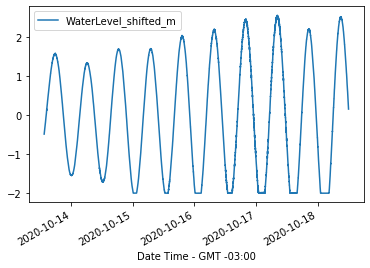

In [25]:
rt[["WaterLevel_shifted_m"]].plot()

# compare

In [26]:
df_2hr = df.shift(periods=-2, freq="H")
rt_2hr = rt.shift(periods=2, freq="H")

In [27]:
starttime = pd.Timestamp('2020-10-17T00:00')
endtime = pd.Timestamp('2020-10-18T00:00')

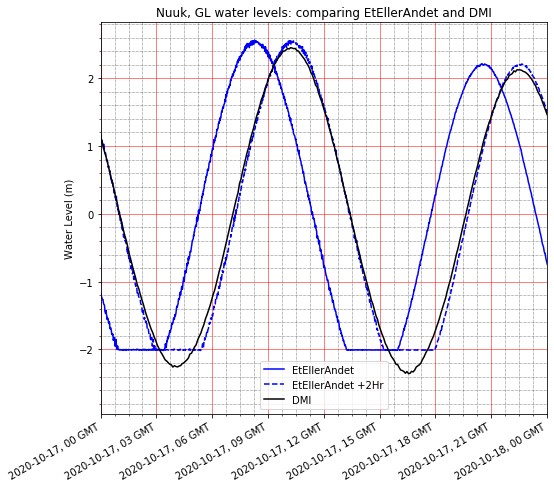

In [28]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Plot
ln1 = plt.plot(rt['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet')
ln2 = plt.plot(rt_2hr['WaterLevel_shifted_m'], '--', color='blue', label='EtEllerAndet +2Hr')
ln3 = plt.plot(df[['prs_shifted']], '-k', label='DMI')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
plt.xlim(starttime, endtime)
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201018.png')

### Read in DMI tide chart

In [29]:
# import urllib3

tide_chart_url ='http://ocean.dmi.dk/tides/2020/Nuuk.t.txt'

# data = urllib.urlopen(tide_chart_url).read()
# urllib.urlretrieve(tide_chart_url, filename="data/Nuuk.t.txt")

In [30]:
df_chart = pd.read_csv(tide_chart_url,
                       skiprows=15,
                       header=None,
                       sep='\t', engine='python')

df_chart.head()

,0,1
0,202001010446,140
1,202001011104,380
2,202001011729,137
3,202001012337,334
4,202001020533,162


In [31]:
columns = ['DATETIME', 'SSH']

if len(df_chart.columns) == len(columns):
    df_chart.columns = columns

# 202001010446
# YYYYmmddHHMM

dt = pd.to_datetime(df_chart['DATETIME'], 
                    format='%Y%m%d%H%M')

df_chart.index = pd.DatetimeIndex(dt)
df_chart = df_chart.drop('DATETIME', axis=1)

# df_chart = df_chart.apply(pd.to_numeric, errors='coerce')

df_chart.head()

,SSH
DATETIME,
2020-01-01 04:46:00,140
2020-01-01 11:04:00,380
2020-01-01 17:29:00,137
2020-01-01 23:37:00,334
2020-01-02 05:33:00,162


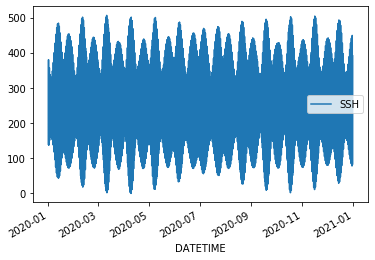

In [32]:
df_chart.plot()

In [33]:
df_chart[['SSH_adj']] = df_chart[['SSH']]/100 - df_chart[['SSH']].mean()/100

df_chart_3hr = df_chart.shift(periods=3, freq="H")


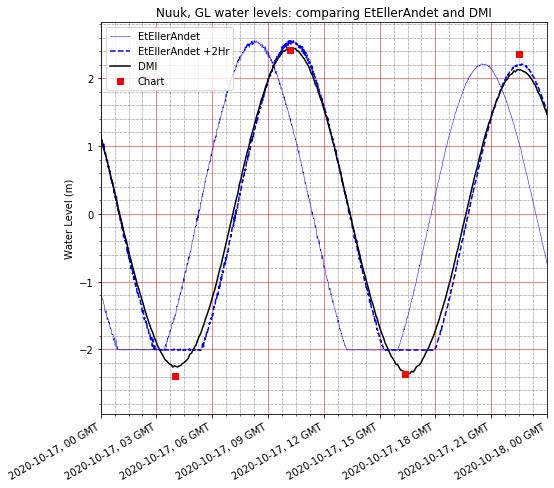

In [34]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Plot
ln1 = plt.plot(rt['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet', lw=0.5)
ln2 = plt.plot(rt_2hr['WaterLevel_shifted_m'], '--', color='blue', label='EtEllerAndet +2Hr')
ln3 = plt.plot(df[['prs_shifted']], '-k', label='DMI')
ln4 = plt.plot(df_chart_3hr[['SSH_adj']], 
               color='red',
               marker='s', linestyle='',
               label='Chart')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
plt.xlim(starttime, endtime)
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201018_wDMIchart.png')

### Zoom in

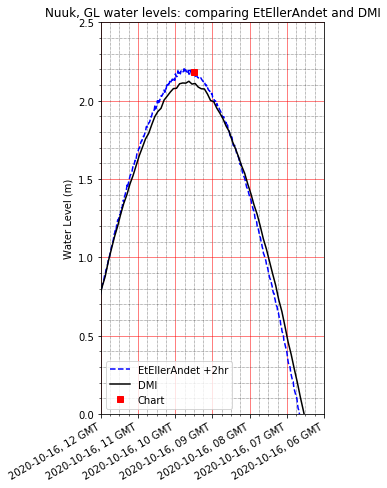

In [35]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111)

#
starttime = pd.Timestamp('2020-10-16T12:00')
endtime = pd.Timestamp('2020-10-16T06:00')

# Plot
# ln1 = plt.plot(rt['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet', lw=0.5)
ln2 = plt.plot(rt_2hr['WaterLevel_shifted_m'], '--', color='blue', label='EtEllerAndet +2hr')
ln3 = plt.plot(df[['prs_shifted']], '-k', label='DMI')
ln4 = plt.plot(df_chart_3hr[['SSH_adj']], 
               color='red',
               marker='s', linestyle='',
               label='Chart')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
plt.xlim(starttime, endtime)
plt.ylim(0, 2.5)


ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201018_wDMIchart_zoomHItide.png')

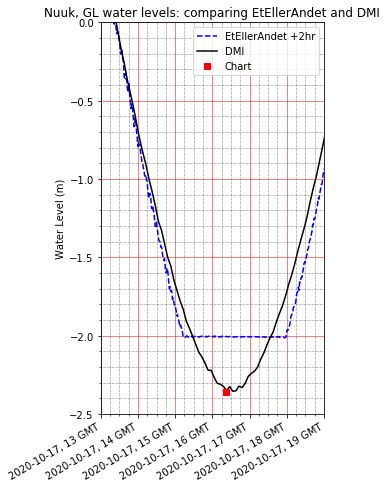

In [36]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111)

#
starttime = pd.Timestamp('2020-10-17T13:00')
endtime = pd.Timestamp('2020-10-17T19:00')

# Plot
# ln1 = plt.plot(rt['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet', lw=0.5)
ln2 = plt.plot(rt_2hr['WaterLevel_shifted_m'], '--', color='blue', label='EtEllerAndet +2hr')
ln3 = plt.plot(df[['prs_shifted']], '-k', label='DMI')
ln4 = plt.plot(df_chart_3hr[['SSH_adj']], 
               color='red',
               marker='s', linestyle='',
               label='Chart')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
plt.xlim(starttime, endtime)
plt.ylim(-2.5, 0)


ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201018_wDMIchart_zoomLOWtide.png')

## Comine them!

In [37]:
df_combined = []

# df_combined = pd.concat([df_monthly['SSH_adj'],
#                          df_CCAR['SSH_adj'].loc[df_monthly.index[-1]:df_CCAR.index[-1]],
#                          df['SSH_adj'].loc[df_CCAR.index[-1]:df.index[-1]]],
#                          keys=['monthly', 'ccar', 'psmsl'])
# df_combined = pd.concat([df_monthly,
#                          df_CCAR.loc[df_monthly.index[-1]:df_CCAR.index[-1]],
#                          df.loc[df_CCAR.index[-1]:df.index[-1]]])
df_combined = pd.concat([df[['prs_shifted']],
                         rt_2hr['WaterLevel_shifted_m'],
                        df_chart_3hr['SSH_adj']],
                       axis=1)

# dt = pd.to_datetime(df_combined['Year'])
# df_combined.index = pd.DatetimeIndex(dt)
# df = df.drop('Date', axis=1)

print(df_combined.loc['2020-10-14T00:00':'2020-10-19T12:00'])

# rt_2hr['WaterLevel_shifted_m'].plot()
# df['prs_shifted'].plot()

# df_combined['SSH_adj'].plot(color='black')
# df_combined['SSH_adj'].resample('M').mean().plot(color='red')



                     prs_shifted  WaterLevel_shifted_m   SSH_adj
2020-10-14 00:00:45          NaN             -0.792281       NaN
2020-10-14 00:01:45          NaN             -0.811178       NaN
2020-10-14 00:02:45          NaN             -0.822151       NaN
2020-10-14 00:03:00    -0.716476                   NaN       NaN
2020-10-14 00:03:45          NaN             -0.833124       NaN
...                          ...                   ...       ...
2020-10-19 11:39:00          NaN                   NaN  2.469936
2020-10-19 11:43:00     2.385524                   NaN       NaN
2020-10-19 11:48:00     2.368524                   NaN       NaN
2020-10-19 11:53:00     2.359524                   NaN       NaN
2020-10-19 11:58:00     2.344524                   NaN       NaN

[8209 rows x 3 columns]


In [38]:
print(df_combined.loc['2020-10-14T00:00':'2020-10-19T12:00'].resample('H').mean().head(36))

# OR resample using Max/Min (or absmax and absmin) to demonstrate impact sample rate, or data delivery rate



                     prs_shifted  WaterLevel_shifted_m   SSH_adj
2020-10-14 00:00:00    -0.966059             -1.081850       NaN
2020-10-14 01:00:00    -1.330976             -1.482433 -1.490064
2020-10-14 02:00:00    -1.353393             -1.513497       NaN
2020-10-14 03:00:00    -1.044893             -1.190603       NaN
2020-10-14 04:00:00    -0.469226             -0.590240       NaN
2020-10-14 05:00:00     0.219107              0.131108       NaN
2020-10-14 06:00:00     0.828857              0.786640       NaN
2020-10-14 07:00:00     1.221607              1.222442  1.419936
2020-10-14 08:00:00     1.280441              1.297819       NaN
2020-10-14 09:00:00     0.990607              0.990749       NaN
2020-10-14 10:00:00     0.392978              0.399616       NaN
2020-10-14 11:00:00    -0.288393             -0.345242       NaN
2020-10-14 12:00:00    -0.951893             -1.065417       NaN
2020-10-14 13:00:00    -1.407559             -1.564053       NaN
2020-10-14 14:00:00    -1

(737708.0, 737714.5)

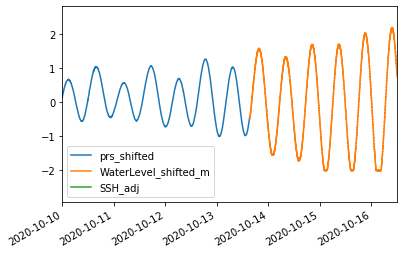

In [47]:
starttime = pd.Timestamp('2020-10-10T00:00')
endtime = pd.Timestamp('2020-10-16T12:00')

df_combined.plot()
plt.xlim(starttime, endtime)

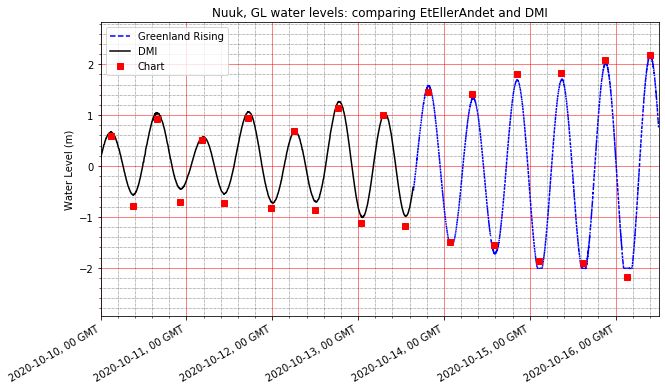

In [48]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# Plot
# ln1 = plt.plot(df_combined['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet', lw=0.5)
ln2 = plt.plot(df_combined['WaterLevel_shifted_m'], '--', color='blue', label='Greenland Rising')
ln3 = plt.plot(df_combined[['prs_shifted']], '-k', label='DMI')
ln4 = plt.plot(df_combined[['SSH_adj']], 
               color='red',
               marker='s', linestyle='',
               label='Chart')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
plt.xlim(starttime, endtime)
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201018_wDMIchart_fortnight.png')

In [46]:
df_combined_hourly = df_combined.loc['2020-10-14T00:00':'2020-10-19T12:00'].resample('H').mean()
df_combined_hourly

,prs_shifted,WaterLevel_shifted_m,SSH_adj
2020-10-14 00:00:00,-0.966059,-1.081850,NaN
2020-10-14 01:00:00,-1.330976,-1.482433,-1.490064
2020-10-14 02:00:00,-1.353393,-1.513497,NaN
2020-10-14 03:00:00,-1.044893,-1.190603,NaN
2020-10-14 04:00:00,-0.469226,-0.590240,NaN
...,...,...,...
2020-10-19 07:00:00,-1.229559,NaN,NaN
2020-10-19 08:00:00,-0.067309,NaN,NaN
2020-10-19 09:00:00,1.102857,NaN,NaN
2020-10-19 10:00:00,1.977607,NaN,NaN


In [42]:
# rename columns OR JUST CHANGE NAME IN CSV
# df = df.rename(columns={'Year': 'YearDec'})

# Make a human readable datetimecolumn
# datetime_human = df_combined_hourly.index.strftime("%Y-%m-%d %H:%M")

columns = ['DATETIME', 'ONSET', 'DMI_gauge', 'DMI_chart']
out_array = np.array([df_combined_hourly.index.strftime("%Y-%m-%d %H:%M"),
                      df_combined_hourly['WaterLevel_shifted_m'],
                      df_combined_hourly['prs_shifted'],
                      df_combined_hourly['SSH_adj']])

df_out = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df_out = df_out.apply(pd.to_numeric, errors='ignore')
# df_out.index = pd.to_datetime(trajectory.index)
df_out.to_csv('data/combined_Nuuk_tidegauges+DMIchart_20201015.csv')  # , na_rep=" ")

## Repeat, but keep the Onset data UNshifted

In [33]:
df_combined = []
df_combined = pd.concat([df[['prs_shifted']],
                         rt['WaterLevel_shifted_m'],
                        df_chart_3hr['SSH_adj']],
                       axis=1)

starttime = pd.Timestamp('2020-10-17T00:00')
endtime = pd.Timestamp('2020-10-18T00:00')

In [40]:
df_combined_hourly = []
df_combined_hourly = df_combined.loc['2020-10-15T00:00':'2020-10-18T00:00'].resample('30Min').mean()

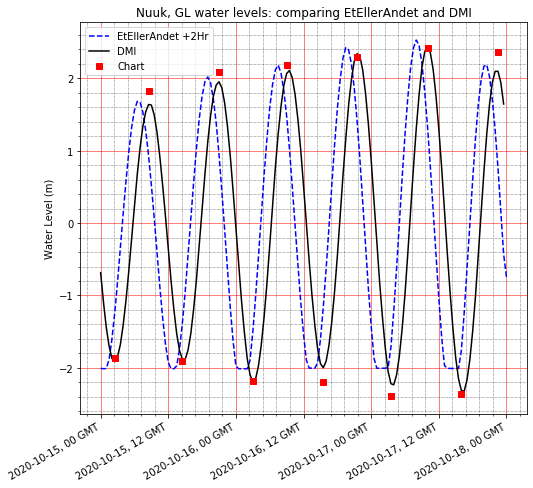

In [43]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Plot
# ln1 = plt.plot(df_combined['WaterLevel_shifted_m'], color='blue', label='EtEllerAndet', lw=0.5)
ln2 = plt.plot(df_combined_hourly['WaterLevel_shifted_m'], '--', color='blue', label='EtEllerAndet +2Hr')
ln3 = plt.plot(df_combined_hourly[['prs_shifted']], '-k', label='DMI')
ln4 = plt.plot(df_combined_hourly[['SSH_adj']], 
               color='red',
               marker='s', linestyle='',
               label='Chart')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
# plt.xlim(starttime, endtime)
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()

In [44]:
# rename columns OR JUST CHANGE NAME IN CSV
# df = df.rename(columns={'Year': 'YearDec'})

# Make a human readable datetimecolumn
# datetime_human = df_combined_hourly.index.strftime("%Y-%m-%d %H:%M")

columns = ['DATETIME', 'ONSET', 'DMI_gauge', 'DMI_chart']
out_array = np.array([df_combined_hourly.index.strftime("%Y-%m-%d %H:%M"),
                      df_combined_hourly['WaterLevel_shifted_m'],
                      df_combined_hourly['prs_shifted'],
                      df_combined_hourly['SSH_adj']])

df_out = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df_out = df_out.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df_out.to_csv('data/combined_Nuuk_tidegauges+DMIchart_20201015_noshift.csv')  # , na_rep=" ")